In [3]:
import json
import cv2
import matplotlib.pyplot as plt

# === 1. JSON 파일 경로와 이미지 경로 지정 ===
json_path = "ST_0118_0006576.json"
base_dir = "./pptx_image"  # 이미지 폴더 (json의 image_file_name 기준)

# === 2. JSON 로드 ===
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)


In [ ]:

# === 3. 이미지 정보 중 첫 번째 그림 가져오기 (예시) ===
img_info = data['training_data_info']['image_info'][0]
image_file = img_info['image_file_name'].replace('./pptx_image', base_dir)
bbox_str = img_info['image_location']  # "[x,y,width,height]" 형태

# === 4. 문자열로 된 좌표 파싱 ===
bbox = [int(x) for x in bbox_str.strip('[]').split(',')]
x, y, w, h = bbox

# === 5. 이미지 불러오기 (OpenCV는 BGR) ===
image = cv2.imread(image_file)
if image is None:
    raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다: {image_file}")

# === 6. 사각형 그리기 ===
# (원본 이미지에 좌표 기준이 다르면 스케일 조정 필요)
vis_img = image.copy()
cv2.rectangle(vis_img, (x, y), (x + w, y + h), (0, 255, 0), 5)  # 초록색 박스

# === 7. matplotlib으로 시각화 (RGB로 변환) ===
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title(f"{img_info['image_name']} 위치 시각화")
plt.axis('off')
plt.show()


In [3]:
data.keys()

dict_keys(['raw_data_meta_info', 'source_data_meta_info', 'training_data_info'])

In [5]:
length = len(data['training_data_info']['image_info'])
length

8

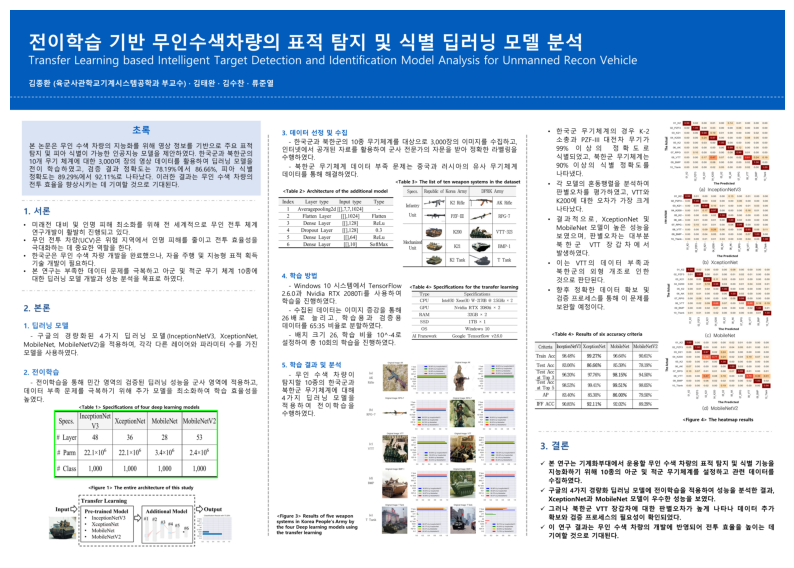

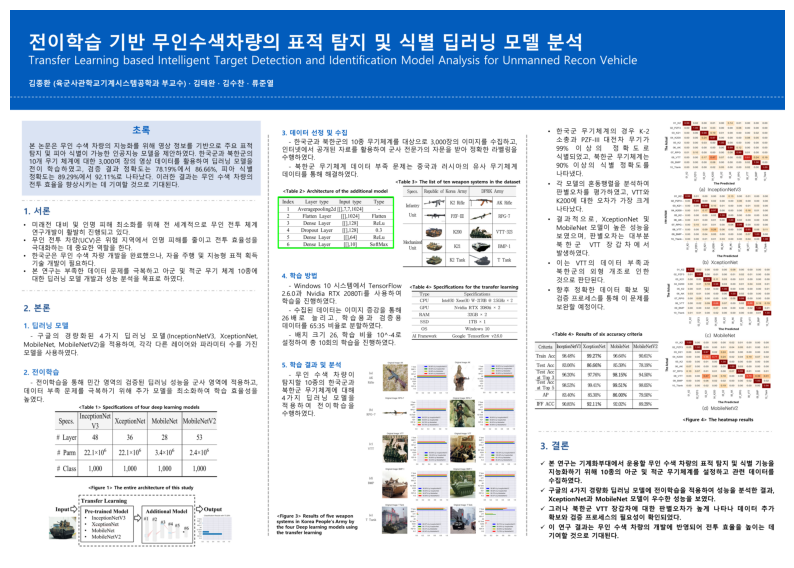

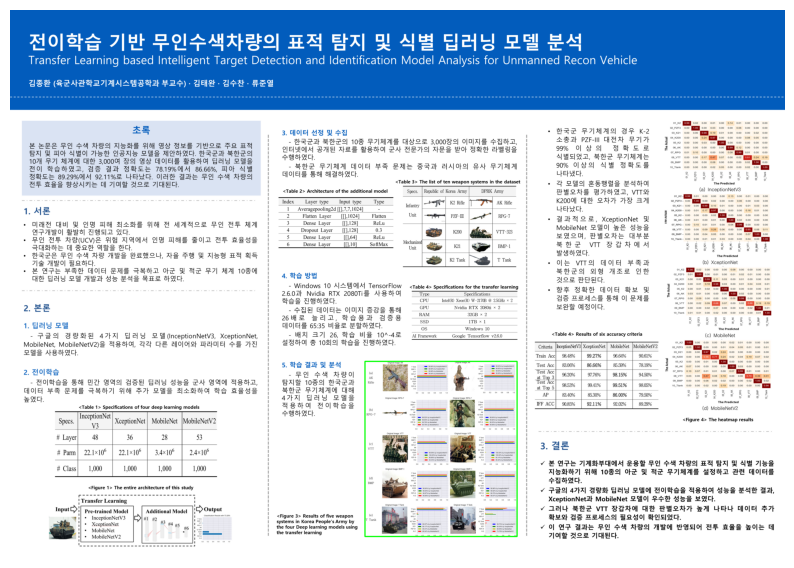

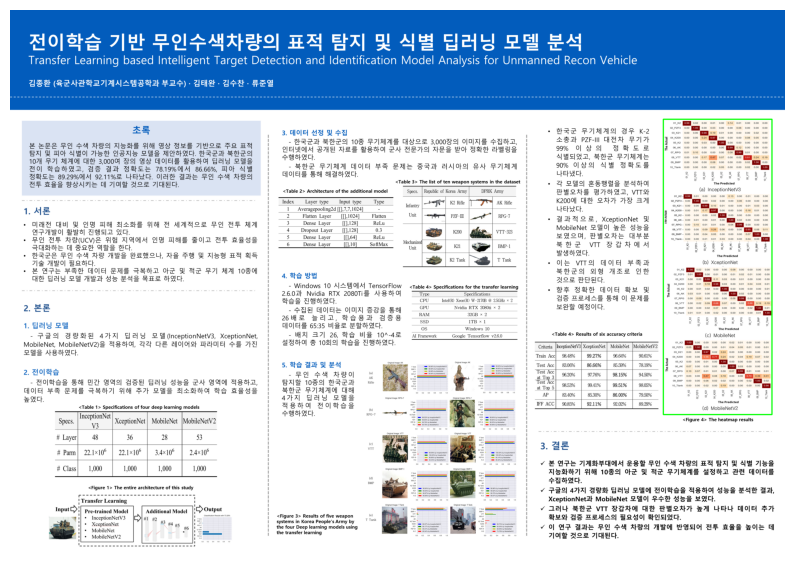

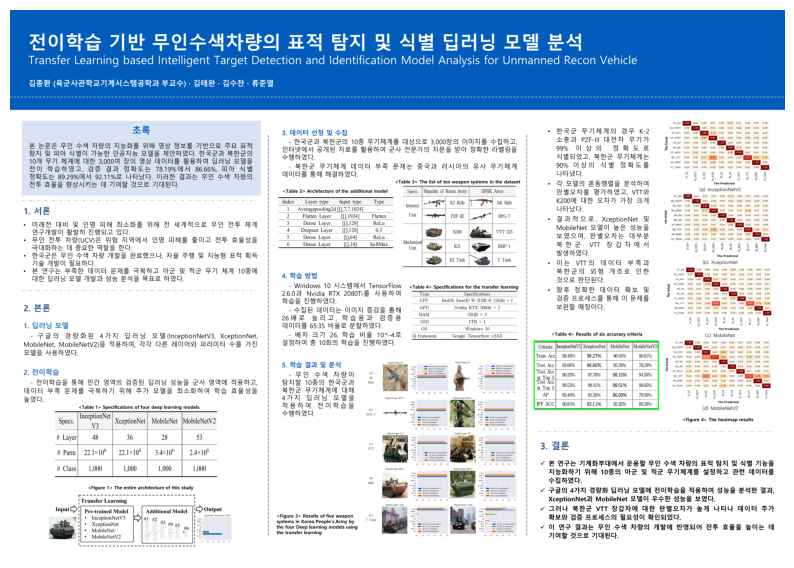

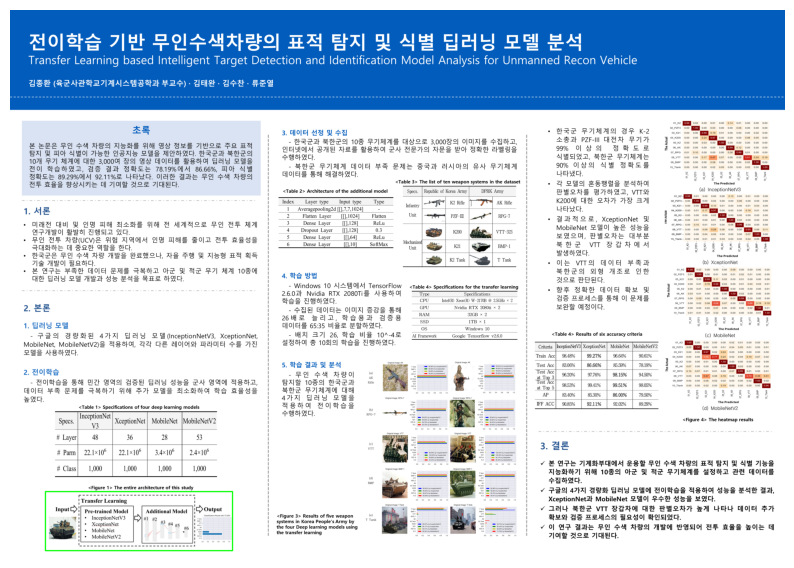

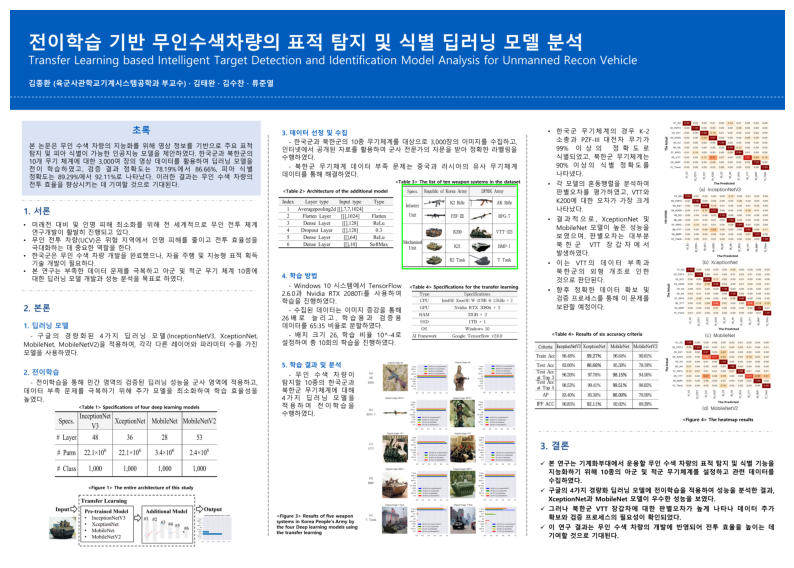

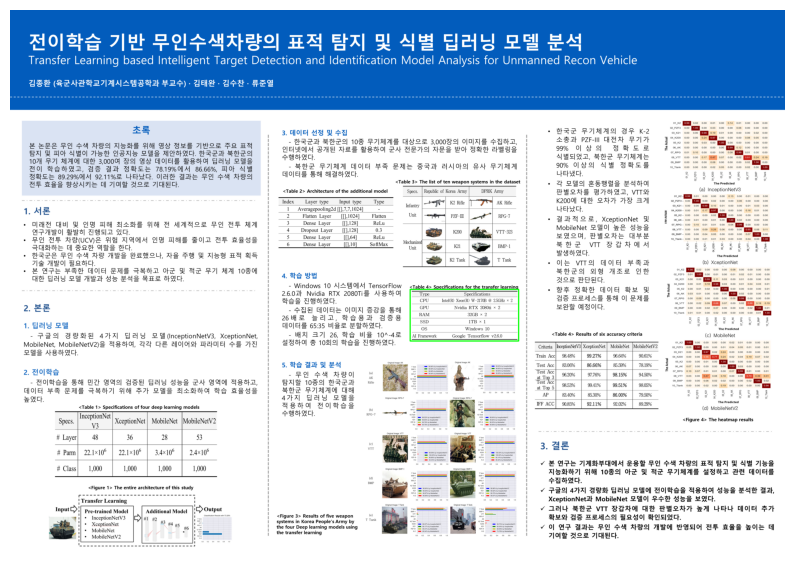

In [14]:
import numpy as np
img_data = np.fromfile('pptx_export_images\슬라이드1.PNG', dtype=np.uint8)
image = cv2.imdecode(img_data, cv2.IMREAD_COLOR)
image

for i in range(length):
    bbox_str = data['training_data_info']['image_info'][i]['image_location']
    bbox = [int(x) for x in bbox_str.strip('[]').split(',')]
    x, y, w, h = bbox
    EMU_PER_INCH = 914400
    DPI = 96  # PowerPoint PNG export 기본 DPI
    EMU_TO_PX = DPI / EMU_PER_INCH  # 1 EMU를 픽셀로 변환하는 비율

    x_px = int(x * EMU_TO_PX)
    y_px = int(y * EMU_TO_PX)
    w_px = int(w * EMU_TO_PX)
    h_px = int(h * EMU_TO_PX)

    vis_img = image.copy()
    cv2.rectangle(vis_img, (x_px, y_px), (x_px + w_px, y_px + h_px), (0, 255, 0), 5)  # 초록색 박스

    # === 7. matplotlib으로 시각화 (RGB로 변환) ===
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
    # plt.title(f"{img_info['image_name']} 위치 시각화")
    plt.axis('off')
    plt.show()

    

c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

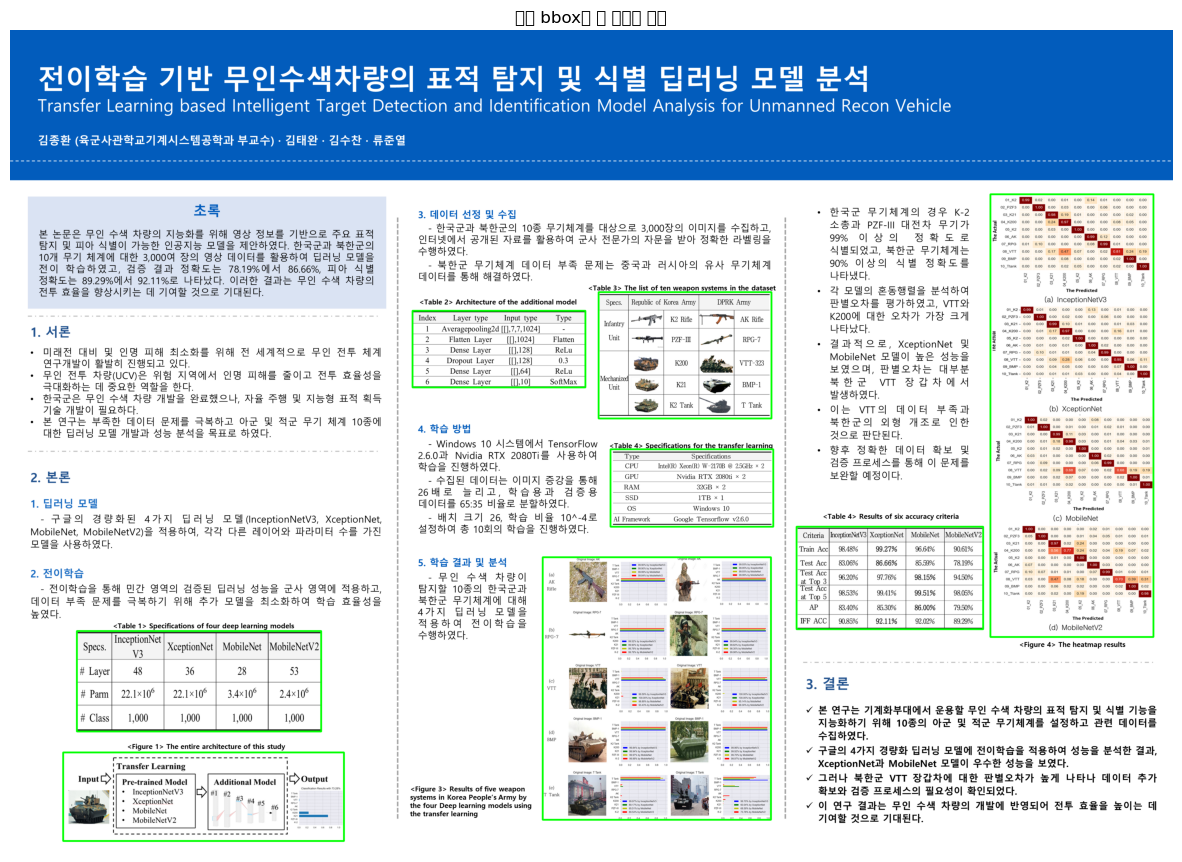

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 포스터 전체 이미지 로드
img_data = np.fromfile('pptx_export_images\\슬라이드1.PNG', dtype=np.uint8)
image = cv2.imdecode(img_data, cv2.IMREAD_COLOR)

# EMU -> PX 변환 비율
EMU_PER_INCH = 914400
DPI = 96  # PowerPoint PNG export 기본 DPI
EMU_TO_PX = DPI / EMU_PER_INCH

# ===== 루프 밖에서 이미지 복사 =====
vis_img = image.copy()

# 모든 bbox를 vis_img 위에 그리기
for i in range(length):
    bbox_str = data['training_data_info']['image_info'][i]['image_location']
    x, y, w, h = [int(v) for v in bbox_str.strip('[]').split(',')]

    x_px = int(x * EMU_TO_PX)
    y_px = int(y * EMU_TO_PX)
    w_px = int(w * EMU_TO_PX)
    h_px = int(h * EMU_TO_PX)

    # 누적해서 그리기
    cv2.rectangle(vis_img, (x_px, y_px), (x_px + w_px, y_px + h_px), (0, 255, 0), 5)

# ===== 루프 끝나고 한 번만 출력 =====
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("모든 bbox를 한 화면에 표시")
plt.show()


In [40]:
print("이미지 크기:", image.shape)  # (height, width, channels)
print("bbox 좌표:", x, y, w, h)

이미지 크기: (3179, 4494, 3)
bbox 좌표: 2457717 22148177 8992736 3699474


In [38]:
import numpy as np
img_data = np.fromfile('pptx_export_images\슬라이드1.PNG', dtype=np.uint8)
image = cv2.imdecode(img_data, cv2.IMREAD_COLOR)
image

array([[[188,  92,   2],
        [188,  92,   2],
        [188,  92,   2],
        ...,
        [188,  92,   2],
        [188,  92,   2],
        [188,  92,   2]],

       [[188,  92,   2],
        [188,  92,   2],
        [188,  92,   2],
        ...,
        [188,  92,   2],
        [188,  92,   2],
        [188,  92,   2]],

       [[188,  92,   2],
        [188,  92,   2],
        [188,  92,   2],
        ...,
        [188,  92,   2],
        [188,  92,   2],
        [188,  92,   2]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

# 1. 포스터 전체 이미지를 PPTX에서 export 해 두었다고 가정
poster_img_path = "poster_full.png"  # pptx를 export한 전체 이미지
poster = cv2.imread(poster_img_path)
if poster is None:
    raise FileNotFoundError("포스터 전체 이미지를 찾을 수 없습니다!")

# 2. JSON 로드
with open("ST_0118_0006576.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 3. 각 이미지 좌표 시각화
vis = poster.copy()
for info in data['image_info']:
    x, y, w, h = [int(v) for v in info['image_location'].strip('[]').split(',')]
    cv2.rectangle(vis, (x, y), (x+w, y+h), (0,255,0), 5)

# 4. 출력
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("포스터 전체 이미지 위 좌표 시각화")
plt.show()


In [35]:
!pip install comtypes

In [8]:
import win32com.client
import os

pptx_path = r"ST_0118_0006576.pptx"
output_dir = r".\pptx_export_images"
os.makedirs(output_dir, exist_ok=True)

# PowerPoint Application 실행
ppt_app = win32com.client.Dispatch("PowerPoint.Application")
ppt_app.Visible = True

# 프레젠테이션 열기
presentation = ppt_app.Presentations.Open(os.path.abspath(pptx_path), WithWindow=False)

# Export: 모든 슬라이드를 PNG로 저장
presentation.Export(os.path.abspath(output_dir), "PNG")

# 닫기
presentation.Close()
ppt_app.Quit()

print(f"✅ 변환 완료! {output_dir} 폴더에 슬라이드별 PNG가 저장되었습니다.")


✅ 변환 완료! .\pptx_export_images 폴더에 슬라이드별 PNG가 저장되었습니다.


In [41]:
EMU_PER_INCH = 914400
DPI = 96  # PowerPoint PNG export 기본 DPI
EMU_TO_PX = DPI / EMU_PER_INCH  # 1 EMU를 픽셀로 변환하는 비율

x_px = int(x * EMU_TO_PX)
y_px = int(y * EMU_TO_PX)
w_px = int(w * EMU_TO_PX)
h_px = int(h * EMU_TO_PX)

print("변환 후 bbox(px):", x_px, y_px, w_px, h_px)

변환 후 bbox(px): 258 2325 944 388


c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

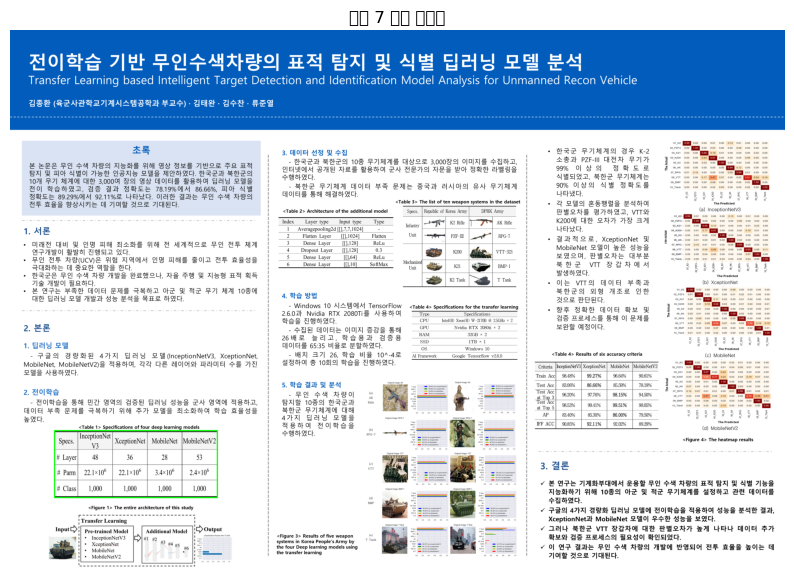

In [42]:
vis_img = image.copy()
cv2.rectangle(vis_img, (x_px, y_px), (x_px + w_px, y_px + h_px), (0, 255, 0), 5)  # 초록색 박스

# === 7. matplotlib으로 시각화 (RGB로 변환) ===
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title(f"{img_info['image_name']} 위치 시각화")
plt.axis('off')
plt.show()

In [19]:
len(data['training_data_info']['section_info'])

24

## pdf 파일

In [91]:
from pdf2image import convert_from_path

pdf_path = r"ST_0118_0006576.pdf"
poppler_path = r"C:\poppler-24.08.0\Library\bin"  # 설치한 경로의 bin 폴더

pages = convert_from_path(pdf_path, dpi=300, poppler_path=poppler_path)
pages[7].save('page2.png', 'PNG')

In [69]:
import cv2, numpy as np
img = cv2.imread('page1.png')

In [92]:
bbox_str_1 = data['training_data_info']['section_info'][1]['location']
bbox_str_2 = data['training_data_info']['section_info'][0]['location']
x1, y1, w1, h1 = [int(v) for v in bbox_str_1.strip('[]').split(',')]
x2, y2, w2, h2 = [int(v) for v in bbox_str_2.strip('[]').split(',')]

In [93]:
x1, y1, w1, h1, x2, y2, w2, h2

(958760, 7283508, 12552380, 2677656, 29189801, 24791923, 13129200, 4548746)

In [72]:
DPI = 300
POINTS_PER_INCH = 72
SCALE = DPI / POINTS_PER_INCH  # points → pixels
x_px = int(x * SCALE)
y_px = int(y * SCALE)
w_px = int(w * SCALE)
h_px = int(h * SCALE)

In [85]:
# EMU_PER_INCH = 914400
EMU_PER_INCH = 8000000
SCALE = 300 / EMU_PER_INCH
x_px = int(x * SCALE)
y_px = int(y * SCALE)
w_px = int(w * SCALE)
h_px = int(h * SCALE)

In [87]:
x_px = int(x * 0.00020860277858901082)
y_px = int(y * 0.0001499277545929791)
w_px = int(w * 0.00014738240875435574)
h_px = int(h * 0.0002166073610650509)

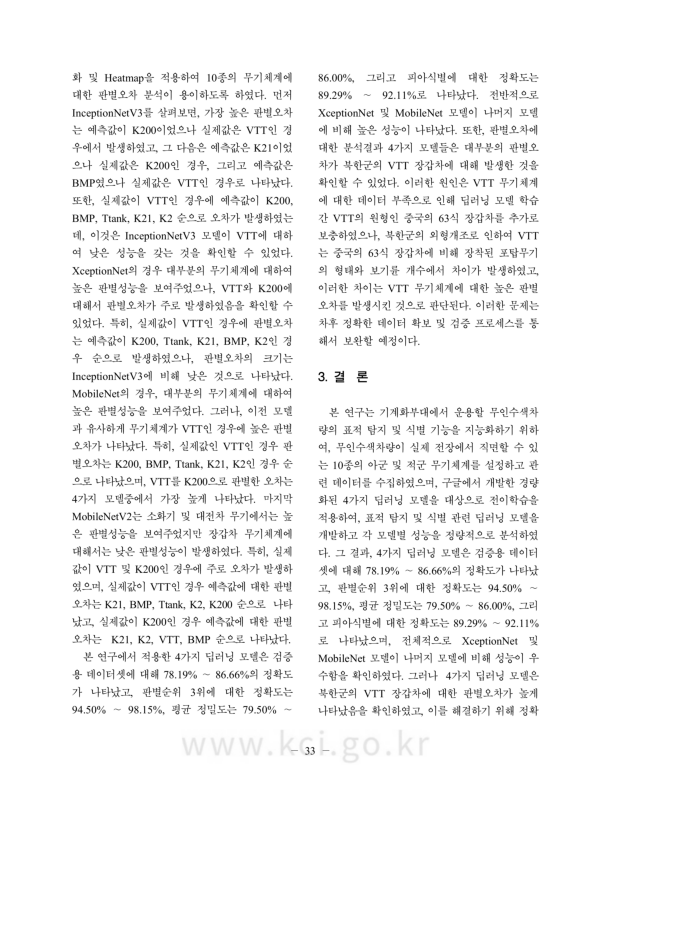

In [88]:
vis_img = img.copy()
cv2.rectangle(vis_img, (x_px, y_px), (x_px+w_px, y_px+h_px), (0,255,0), 3)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [89]:
x, y, w, h

(29189801, 24791923, 13129200, 4548746)

In [80]:
x_px, y_px, w_px, h_px

(2918, 2479, 1312, 454)

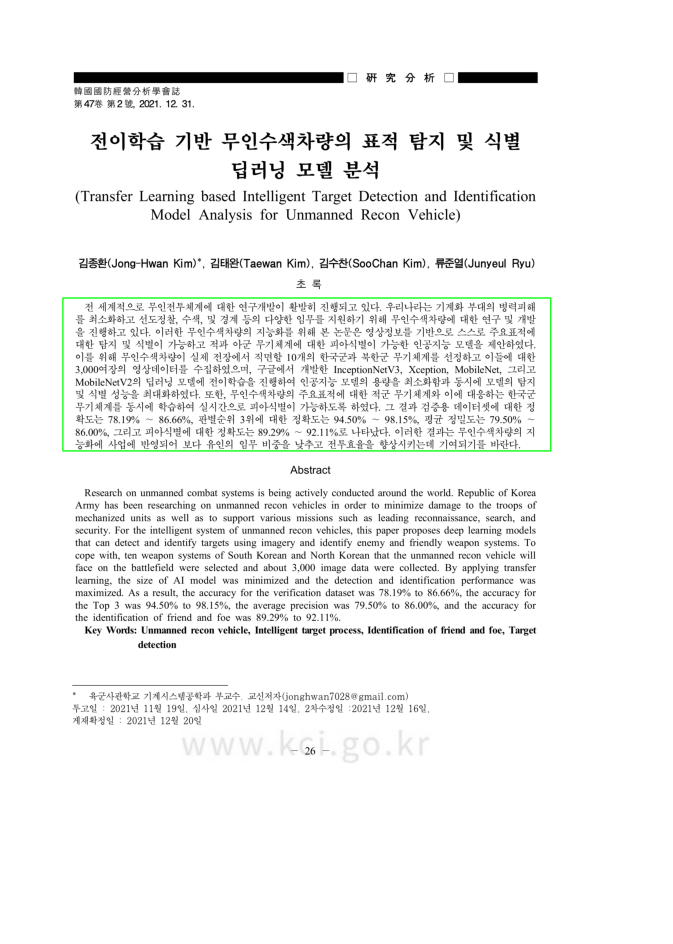

In [64]:
vis_img = img.copy()
cv2.rectangle(vis_img, (200, 1092), (200+1850, 1092+580), (0,255,0), 3)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [65]:
200/958760, 1092/7283508, 1850/12552380, 580/2677656

(0.00020860277858901082,
 0.0001499277545929791,
 0.00014738240875435574,
 0.0002166073610650509)

In [55]:
y_px

2389

In [58]:
300/2000000

0.00015